In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit

In [2]:
# https://www.kaggle.com/datasets/mruanova/piratesvsglobalwarmingcorrelationcausation

In [3]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 11

In [4]:
ano = np.array([1820, 1860, 1880, 1920, 1940, 1980, 2000])

temperatura_global = np.array([14.25, 14.35, 14.75, 14.85, 15.25, 15.65, 15.95])

n_piratas = np.array([45000, 35000, 20000, 15000, 5000, 400, 17])



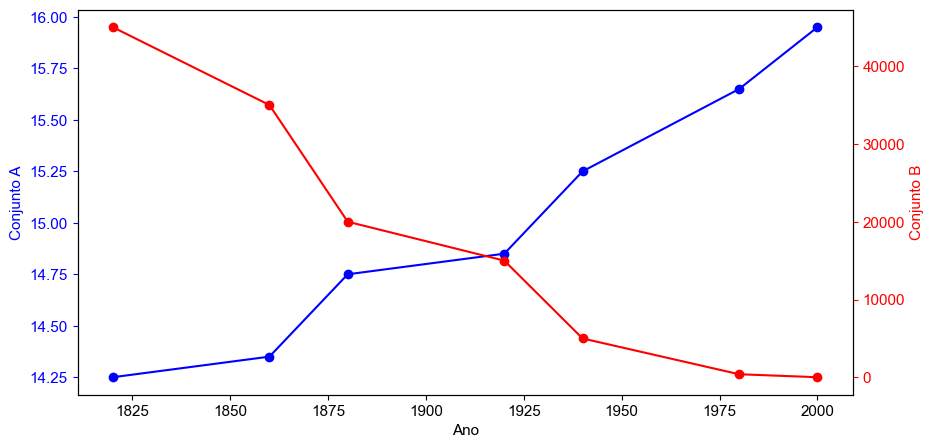

In [5]:
fig, ax = plt.subplots(figsize=(10,5))
color_a = "b"
p1, = ax.plot(ano, temperatura_global, marker='o', c=color_a)

twinx = ax.twinx()
color_b = "r"
p2, = twinx.plot(ano, n_piratas, marker='o', c=color_b)

ax.yaxis.label.set_color(p1.get_color())
twinx.yaxis.label.set_color(p2.get_color())

ax.tick_params(axis='y', colors=p1.get_color())
twinx.tick_params(axis='y', colors=p2.get_color())


ax.set_xlabel("Ano")
ax.set_ylabel("Temperatura média global (°C)")
ax.set_ylabel("Conjunto A")
twinx.set_ylabel("Quantidade de piratas")
twinx.set_ylabel("Conjunto B")

# ax.yaxis.label.set_color('none')
# twinx.yaxis.label.set_color('none')

plt.show()

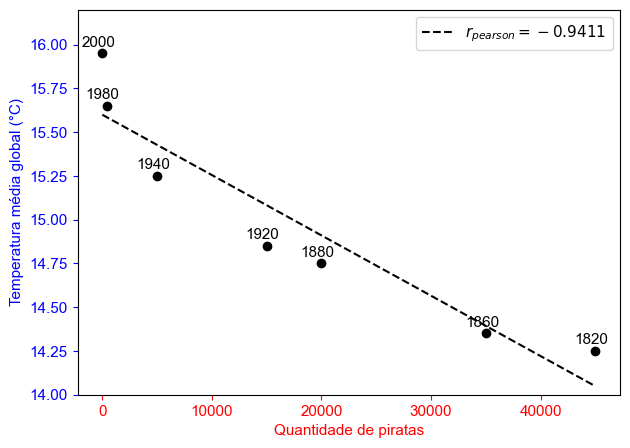

In [6]:
fig, ax = plt.subplots(figsize=(7,5))

ax.scatter(n_piratas, temperatura_global, marker='o', c='k')

ax.set_ylabel("Conjunto A")
ax.set_ylabel("Temperatura média global (°C)")
ax.set_xlabel("Conjunto B")
ax.set_xlabel("Quantidade de piratas")

reg = stats.linregress(n_piratas, temperatura_global, )
x_pred = np.array([n_piratas.min(), n_piratas.max()])
y_pred = reg[1] + reg[0]*x_pred
r_pearson, _ = stats.pearsonr(n_piratas, temperatura_global)
label = "$r_{pearson}=" + str(round(r_pearson, 4)) + "$" 
# label = None
ax.plot(x_pred, y_pred, c="k", ls='--', label=label)

for i in range(len(ano)):
    ax.annotate(ano[i], xy=(n_piratas[i], temperatura_global[i]), xytext=(-15, 5), textcoords='offset points')
    


ax.tick_params(axis='y', colors=color_a)
ax.yaxis.label.set_color(color_a)
ax.xaxis.label.set_color(color_b)
ax.tick_params(axis='x', colors=color_b)
ax.legend()
ax.set_ylim(14, 16.2)
plt.show()